In [1]:
%load_ext autoreload
%autoreload

In [13]:
noise_label="_noise"
name_file_inj_res_dict = "artificial_10_10k_results_bias_injection"

In [3]:
import os

output_fig_dir = os.path.join(os.path.curdir, "output", "figures", "output_artificial")
from pathlib import Path

Path(output_fig_dir).mkdir(parents=True, exist_ok=True)

In [4]:
abbreviations={"_one_at_time":"", "entropy":"entr", "weighted_sum_abs_reference_s":"w$\Delta$"}

def abbreviate_dict_i(info_plot, abbreviations):
    info_plot_abbr = {}
    for k,v in info_plot.items():
        new_k = k
        for a,s in abbreviations.items():
            new_k = new_k.replace(a,s)
        info_plot_abbr[new_k] = v
    return info_plot_abbr

In [5]:
labels_map = {"one_at_time": "Individual trees", "with_gen":"All items", \
             "without_gen": "Leaf items", "all_attributes": "Combined tree",\
             "entropy":"entr", "weighted_sum_abs_reference_s":"wdiv"}

# Read results

In [6]:
import pickle

with open(
    f"./{name_file_inj_res_dict}.pickle",
    "rb",
) as fp:
    output_results = pickle.load(fp)

In [7]:
similarity = output_results["similarity"]
nodes = output_results["nodes"]

In [8]:
type_experiments = ["one_at_time", "all_attributes"]
type_criterions = ["entropy", "weighted_sum_abs_reference_s"]
type_gens = ["with_gen", "without_gen"]

In [9]:
def select_keys(dict_i, keys_sel):
    return {k:dict_i[k] for k in keys_sel if k in dict_i}

# Merge results for criterion

In [10]:
from copy import deepcopy

merged_name = deepcopy(output_results)

In [11]:
for info in merged_name:
    for type_gen in merged_name[info]:
        for type_exp in merged_name[info][type_gen]:
            for type_criterion in output_results[info][type_gen][type_exp]:
                merged_name[info][type_gen][type_exp][type_criterion]={}
                for support, dict_i in output_results[info][type_gen][type_exp][type_criterion].items():
                    n = "$s_{{tree}}$"
                    merged_name[info][type_gen][type_exp][type_criterion][f"{type_criterion} {n}={support}"] = dict_i

# Gain

## Individual

./output/figures/output_artificial/artificial_mingain_fmeasure_nodes_noise_All_items_Individual_trees.pdf


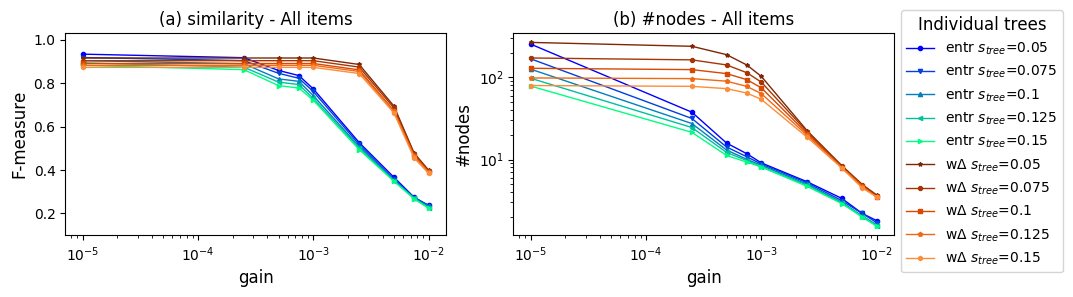

In [14]:
info_1 = "similarity"
info_2 = "nodes"

type_experiment = "one_at_time" # "all_attributes"
type_gen = "with_gen"

c1, c2 = "entropy", "weighted_sum_abs_reference_s"

xlog_scale = True

info_dicts_1, info_dicts_2 = {}, {}
for type_criterion in [c1, c2]:
    info_dicts_1.update(merged_name[info_1][type_gen][type_experiment][type_criterion])
    info_dicts_2.update(merged_name[info_2][type_gen][type_experiment][type_criterion])
    
min_v = min([v for v1 in info_dicts_1.values() for v in v1.values()])

if min_v<0.18:
    print(min_v)
    raise ValueError()
    
    
import matplotlib.pyplot as plt
import numpy as np
ks = [k for k in info_dicts_1 if "entropy" in k]
colors = plt.cm.winter(np.linspace(0, 1, len(ks)))
colors_map = dict(zip(ks, colors))

ks = [k for k in info_dicts_1 if "weighted_sum_abs_reference_s" in k]
colors = plt.cm.Oranges(np.linspace(0, 1, len(ks)+4))[-len(ks):][::-1]
colors_map.update(dict(zip(ks, colors)))




info_dicts_1 = abbreviate_dict_i(info_dicts_1, abbreviations)
info_dicts_2 = abbreviate_dict_i(info_dicts_2, abbreviations)

xlog_label = ""
if xlog_scale:
    xlog_label = "_log"


config = f"{labels_map[type_gen].replace(' ', '_')}_{labels_map[type_experiment].replace(' ', '_')}"
import os
figure_name = os.path.join(output_fig_dir, f"artificial_mingain_fmeasure_nodes{noise_label}_{config}.pdf")
print(figure_name)

from utils_plot import two_plots_shared_labels_distinct_axis
two_plots_shared_labels_distinct_axis(info_dicts_1, info_dicts_2, outside=True, title=labels_map[type_experiment], fontsize=12, \
          figure_name=figure_name, xlabel="gain", label_1=f"(a) {info_1} - {labels_map[type_gen]}",
           label_2=f"(b) #{info_2} - {labels_map[type_gen]}",
          sizeFig=(9,2.9),\
          color_labels=abbreviate_dict_i(colors_map,abbreviations),\
          ylabel_1="F-measure", log_scale_1=False, log_scale_2=True, save_fig=True,\
          ylabel_2="#nodes", legend_size=10, bbox_to_anchor=(1,1.15),
          y1_limit=[0.1, 1.03], label_1_short=None, label_2_short=None,
         x_log_scale_1 = xlog_scale, x_log_scale_2= xlog_scale )

## All attributes

./output/figures/output_artificial/artificial_mingain_fmeasure_nodes_noise_All_items_Combined_tree.pdf


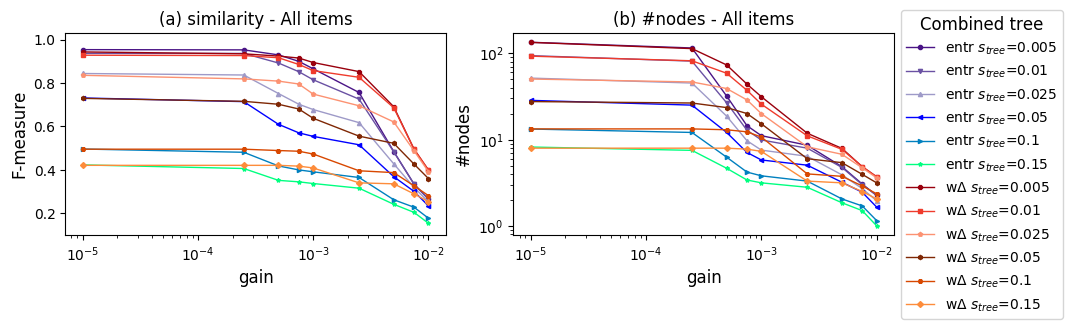

In [15]:
info_1 = "similarity"
info_2 = "nodes"

type_experiment = "all_attributes" # "one_at_time"
type_gen = "with_gen"

c1, c2 = "entropy", "weighted_sum_abs_reference_s"

xlog_scale = True

info_dicts_1, info_dicts_2 = {}, {}
for type_criterion in [c1, c2]:
    info_dicts_1.update(merged_name[info_1][type_gen][type_experiment][type_criterion])
    info_dicts_2.update(merged_name[info_2][type_gen][type_experiment][type_criterion])
    
min_v = min([v for v1 in info_dicts_1.values() for v in v1.values()])

if min_v<0.1:
    print(min_v)
    raise ValueError()
    
        
info_tmp = merged_name[info_1]["with_gen"]["one_at_time"][c1] 

import matplotlib.pyplot as plt
import numpy as np
ks = [k for k in info_tmp if "entropy" in k]
colors = plt.cm.winter(np.linspace(0, 1, len(ks)))
colors_map = dict(zip(ks, colors))
info_tmp = merged_name[info_1]["with_gen"]["one_at_time"][c2] 


ks = [k for k in info_tmp if "weighted_sum_abs_reference_s" in k]
colors = plt.cm.Oranges(np.linspace(0, 1, len(ks)+4))[-len(ks):][::-1]
colors_map.update(dict(zip(ks, colors)))


colors_map['entropy $s_{{tree}}$=0.005'] ="#4a1486"
colors_map['entropy $s_{{tree}}$=0.01'] = "#6a51a3"
colors_map['entropy $s_{{tree}}$=0.025'] = "#9e9ac8"

colors_map['weighted_sum_abs_reference_s $s_{{tree}}$=0.005'] =  "#99000d"
colors_map['weighted_sum_abs_reference_s $s_{{tree}}$=0.01'] = "#ef3b2c"
colors_map['weighted_sum_abs_reference_s $s_{{tree}}$=0.025'] = "#fc9272"  


keys_1 = [0.05,  0.1,  0.15]
to_add = [0.005, 0.01, 0.025]


show_keys_1 = [k for k in info_dicts_1.keys() if float(k.split("=")[1]) in keys_1+to_add]
show_keys_2 = [k for k in info_dicts_2.keys() if float(k.split("=")[1]) in keys_1+to_add]





info_dicts_1 = abbreviate_dict_i(select_keys(info_dicts_1, show_keys_1), abbreviations)
info_dicts_2 = abbreviate_dict_i(select_keys(info_dicts_2, show_keys_2), abbreviations)

xlog_label = ""
if xlog_scale:
    xlog_label = "_log"


config = f"{labels_map[type_gen].replace(' ', '_')}_{labels_map[type_experiment].replace(' ', '_')}"
import os
figure_name = os.path.join(output_fig_dir, f"artificial_mingain_fmeasure_nodes{noise_label}_{config}.pdf")
print(figure_name)

from utils_plot import two_plots_shared_labels_distinct_axis
two_plots_shared_labels_distinct_axis(info_dicts_1, info_dicts_2, outside=True, title=labels_map[type_experiment], fontsize=12, \
          figure_name=figure_name, xlabel="gain", label_1=f"(a) {info_1} - {labels_map[type_gen]}",
           label_2=f"(b) #{info_2} - {labels_map[type_gen]}",
          sizeFig=(9,2.9),\
          color_labels=abbreviate_dict_i(colors_map,abbreviations),\
          ylabel_1="F-measure", log_scale_1=False, log_scale_2=True, save_fig=True,\
          ylabel_2="#nodes", legend_size=10, bbox_to_anchor=(1,1.15),
        y1_limit=[0.1, 1.03],label_1_short=None, label_2_short=None,
        x_log_scale_1 = xlog_scale, x_log_scale_2= xlog_scale )

# Nodes vs F-measure

In [ ]:
import pickle

with open(
    f"./{name_file_inj_res_dict}.pickle",
    "rb",
) as fp:
    output_results = pickle.load(fp)

In [16]:
from copy import deepcopy

merged_name = deepcopy(output_results)

In [17]:
similarity = merged_name["similarity"]
nodes = merged_name["nodes"]

In [18]:
for info in merged_name:
    for type_gen in merged_name[info]:
        for type_exp in merged_name[info][type_gen]:
            for type_criterion in output_results[info][type_gen][type_exp]:
                merged_name[info][type_gen][type_exp][type_criterion]={}
                for support, dict_i in output_results[info][type_gen][type_exp][type_criterion].items():
                    n = "$s_{{tree}}$"
                    merged_name[info][type_gen][type_exp][type_criterion][f"{type_criterion} {n}={support}"] = dict_i

In [19]:
type_experiments = ["one_at_time", "all_attributes"]
type_criterions = ["entropy", "weighted_sum_abs_reference_s"]
type_gens = ["with_gen", "without_gen"]

In [20]:
def get_dict_nodes_similarity(similarity_i, nodes_i):
    
    nodes_similarity_i = {}
    for support_cr, dict_i in similarity_i.items():
        nodes_similarity_i[support_cr] = {}
        for gain in dict_i:
            similarity_value = similarity_i[support_cr][gain]
            number_nodes = nodes_i[support_cr][gain]
            if number_nodes in nodes_similarity_i[support_cr]:
                if similarity_value!=nodes_similarity_i[support_cr][number_nodes]:
                    raise ValueError("TODO")
            nodes_similarity_i[support_cr][number_nodes]=similarity_value
        nodes_similarity_i[support_cr] = dict(sorted(nodes_similarity_i[support_cr].items(), reverse=False))
    return nodes_similarity_i

In [21]:
nodes_similarity={}
for type_gen in type_gens:    
    for type_exp in type_experiments:
        for type_criterion in type_criterions:
            if type_exp in similarity[type_gen]:
                similarity_i = similarity[type_gen][type_exp][type_criterion]
                nodes_i = nodes[type_gen][type_exp][type_criterion]
                v = get_dict_nodes_similarity(similarity_i, nodes_i)
                nodes_similarity.setdefault(type_gen, {}).setdefault(type_exp, {})[type_criterion] = v

## Plot

In [22]:
def select_keys(dict_i, keys_sel):
    return {k:dict_i[k] for k in keys_sel if k in dict_i}

./output/figures/output_artificial/artificial_nodes_vs_fmeasure_nodes_mingain_noise_All_items.pdf
['entr $s_{{tree}}$=0.005', 'entr $s_{{tree}}$=0.01', 'entr $s_{{tree}}$=0.025', 'entr $s_{{tree}}$=0.05', 'entr $s_{{tree}}$=0.1', 'entr $s_{{tree}}$=0.15', 'w$\\Delta$ $s_{{tree}}$=0.005', 'w$\\Delta$ $s_{{tree}}$=0.01', 'w$\\Delta$ $s_{{tree}}$=0.025', 'w$\\Delta$ $s_{{tree}}$=0.05', 'w$\\Delta$ $s_{{tree}}$=0.1', 'w$\\Delta$ $s_{{tree}}$=0.15']


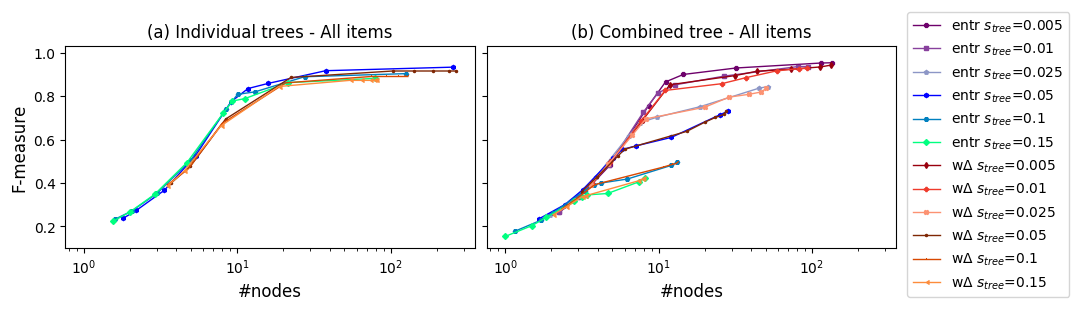

In [23]:
type_experiment_1 = "one_at_time"
type_experiment_2 = "all_attributes"

type_experiment = "one_at_time"
type_gen = "with_gen"

import numpy as np

import matplotlib.pyplot as plt

info_plot_1 = {}
info_plot_2 = {}

c1, c2 = "entropy", "weighted_sum_abs_reference_s"

xlog_scale = True

for type_criterion in [c1, c2]:
    info_plot_1.update(nodes_similarity[type_gen][type_experiment_1][type_criterion])
    info_plot_2.update(nodes_similarity[type_gen][type_experiment_2][type_criterion])
    
min_v = min(min([v for v1 in info_plot_1.values() for v in v1.values()]), min([v for v1 in info_plot_2.values() for v in v1.values()]))    

if min_v<0.1:
    print(min_v)
    raise ValueError()
    
    
ks = [k for k in info_plot_1 if "entropy" in k]
colors = plt.cm.winter(np.linspace(0, 1, len(ks)))
colors_map = dict(zip(ks, colors))

ks = [k for k in info_plot_1 if "weighted_sum_abs_reference_s" in k]

colors = plt.cm.Oranges(np.linspace(0, 1, len(ks)+4))[-len(ks):][::-1]
colors_map.update(dict(zip(ks, colors)))

ks = [k for k in info_plot_2 if "entropy" in k]
ks = [k for k in info_plot_2 if "weighted_sum_abs_reference_s" in k]


keys_1 = [0.05, 0.1,  0.15]
to_add = [0.005, 0.01, 0.025]



show_keys_1 = [k for k in info_plot_1.keys() if float(k.split("=")[1]) in keys_1+to_add]

show_keys_2 = [k for k in info_plot_2.keys() if float(k.split("=")[1]) in keys_1+to_add]
keys_2 = [float(k.split("=")[1]) for k in info_plot_2.keys()]


colors_map['entropy $s_{{tree}}$=0.005'] ="#6e016b"
colors_map['entropy $s_{{tree}}$=0.01'] = "#88419d"
colors_map['entropy $s_{{tree}}$=0.025'] = "#8c96c6"

colors_map['weighted_sum_abs_reference_s $s_{{tree}}$=0.005'] =  "#99000d"
colors_map['weighted_sum_abs_reference_s $s_{{tree}}$=0.01'] = "#ef3b2c"
colors_map['weighted_sum_abs_reference_s $s_{{tree}}$=0.025'] = "#fc9272"  


info_plot_1 = abbreviate_dict_i(select_keys(info_plot_1, show_keys_1), abbreviations)
info_plot_2 = abbreviate_dict_i(select_keys(info_plot_2, show_keys_2), abbreviations)




xlog_label = ""
if xlog_scale:
    xlog_label = "_log"

    
output_order=list(set(list(info_plot_1.keys()) + list(info_plot_2.keys())))

output_order.sort()


import os
figure_name = os.path.join(output_fig_dir, f"artificial_nodes_vs_fmeasure_nodes_mingain{noise_label}_{labels_map[type_gen].replace(' ', '_')}.pdf")
print(figure_name)
sizeFig=(9,3.2)
from utils_plot import two_plots_v2
two_plots_v2(info_plot_1, info_plot_2, outside=True, title="",  
                  fontsize=12, xlabel="#nodes", 
             label_1=f"(a) {labels_map[type_experiment_1]} - {labels_map[type_gen]}",\
                label_2 = f"(b) {labels_map[type_experiment_2]} - {labels_map[type_gen]}",\
                sizeFig=(9,2.9), output_order = output_order, \
             color_labels=abbreviate_dict_i(colors_map,abbreviations), \
              bbox_to_anchor=(1,1.05), label_1_short=None, label_2_short=None, legend_size=10,
              ylabel="F-measure", xlog_scale=True, log_scale=False, save_fig=True, \
                figure_name=figure_name, sharex = True, ylimit=[0.1, 1.03]) 